# Stock Analysis Notebook

### Introduction
- In this notebook, we analyze stock data using technical indicators and financial metrics. The results are visualized to provide insights into the stock performance.


Cell 1: Notebook Title and Introduction

In [32]:
# Add the project root to the Python path
import sys
from pathlib import Path

# Get the project root (adjust as necessary)
project_root = Path("../").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


In [37]:
from src import visualization
print(dir(visualization))  # Check if 'plot_bollinger_bands' appears

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'plot_macd', 'plot_price_with_indicators', 'plot_rsi', 'plt', 'sns']


Cell 2: Import Libraries and Modules

In [41]:
# Import Libraries and Modules
from src.data_loader import load_all_stock_data
# from src.indicators import add_ta_indicators
from src.financial_metrics import calculate_all_metrics
from src import visualization
from src.visualization import plot_price_with_indicators, plot_rsi, plot_macd


Ensure the data is loaded into a pandas DataFrame with columns: Open, High, Low, Close, and Volume.

In [3]:
# Preview the first 10 rows and column names of the loaded data
stock_data = load_all_stock_data('../Data/yfinance_data')  # Update the path as needed
sample_ticker = list(stock_data.keys())[0]  # Select the first ticker for preview
print(f"Previewing data for: {sample_ticker}\n")
print(stock_data[sample_ticker].head(10))  # First 10 rows
print("\nColumn Names:")
print(stock_data[sample_ticker].columns.tolist())  # Column names


Previewing data for: GOOG

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   
2004-08-26  2.613952  2.688672  2.606729  2.687676   2.684621  142572401   
2004-08-27  2.692408  2.705360  2.632383  2.643840   2.640835  124826132   
2004-08-30  2.622171  2.627402  2.540727  2.540727   2.537839  104429967   
2004-08-31  2.547950  2.583068  2.544463  2.549693   2.546795   98825037   
2004-09-01  2.557912  2.564637  2.482445  2.496891   2.494053  183633734   

            Dividends  Stock Splits  
Date                  

/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instea

Cell 3: Load Data

In [10]:
# ### Load Data
# Load all stock data from the raw data folder.
# Update the path to match your local file structure.
stock_data = load_all_stock_data('../Data/yfinance_data')

# Display available tickers
tickers = list(stock_data.keys())
print(f"Available tickers: {tickers}")


Available tickers: ['GOOG', 'MSFT', 'AAPL', 'AMZN', 'META', 'TSLA', 'NVDA']


/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values
/home/sasa/Documents/code/KIAM/week1/src/data_loader.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instea

Cell 4: Process and Analyze All Stocks

In [ ]:
from src.indicators import add_ta_indicators

# ### Process and Analyze All Stocks
for ticker, df in stock_data.items():
    print(f"Processing {ticker}...")

    # Add technical indicators
    # from src.indicators import add_ta_indicators
    # Make sure add_ta_indicators is imported before using it
    df = add_ta_indicators(df)

    # Calculate financial metrics
    metrics = calculate_all_metrics(df)

    # Display metrics
    print(f"Metrics for {ticker}:")
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    # Visualize results
    plot_price_with_indicators(df, ticker)
    plot_rsi(df, ticker)
    plot_macd(df, ticker)


In [11]:
# ### Summary
# All stocks have been processed. 
# Use the visualizations and metrics above to draw insights and comparisons.


In [12]:
from src.indicators import add_ta_indicators

In [13]:
df = add_ta_indicators(df)

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'MACD',
       'MACD_Signal', 'MACD_Hist'],
      dtype='object')

In [15]:
df.tail(10)  # Display the first 10 rows of the DataFrame with indicators added

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_10,SMA_50,EMA_10,RSI,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,,
2024-07-17,121.349998,121.849998,116.720001,117.989998,117.989998,390086200,0.0,0.0,127.803001,115.02780,126.171786,43.786836,2.515052,4.087603,-1.572551
2024-07-18,121.849998,122.400002,116.559998,121.089996,121.089996,320979500,0.0,0.0,127.084001,115.60680,125.247824,47.499207,1.917760,3.653634,-1.735875
2024-07-19,120.349998,121.599998,117.370003,117.930000,117.930000,217223800,0.0,0.0,126.294001,116.15432,123.917311,44.288408,1.175861,3.158080,-1.982218
2024-07-22,120.349998,124.070000,119.860001,123.540001,123.540001,258068900,0.0,0.0,125.828001,116.81688,123.848709,50.664406,1.028723,2.732208,-1.703485
2024-07-23,122.779999,124.690002,122.099998,122.589996,122.589996,173911000,0.0,0.0,124.949001,117.49374,123.619852,49.628591,0.825937,2.350954,-1.525017
2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,122.883000,117.98118,121.916243,41.589800,-0.007652,1.879233,-1.886885
2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,121.371000,118.41880,120.164198,39.943932,-0.817813,1.339824,-2.157637
2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,119.752999,118.85288,118.872526,40.940507,-1.381013,0.795656,-2.176669
2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,118.067999,119.19208,117.548429,39.606589,-1.923793,0.251767,-2.175559


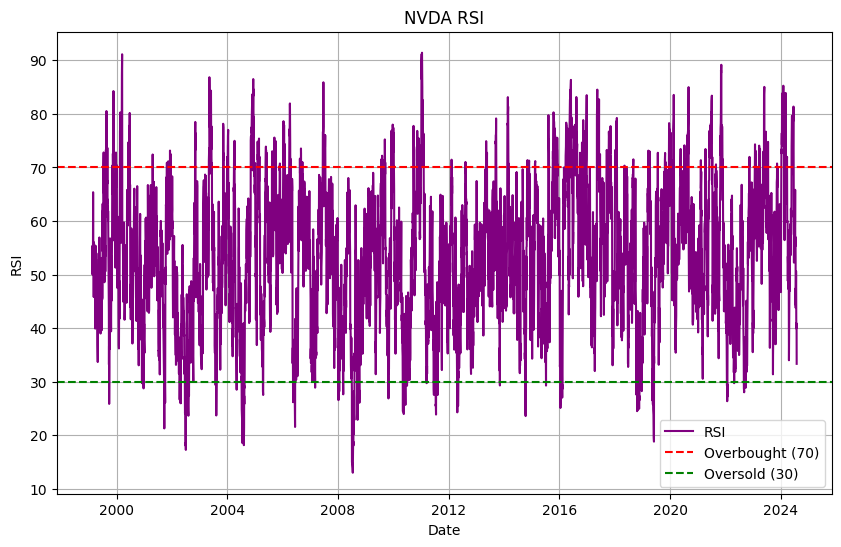

In [16]:
#call plot_rsi function
plot_rsi(df, ticker)

ImportError: cannot import name 'plot_bollinger_bands' from 'src.visualization' (/home/sasa/Documents/code/KIAM/week1/src/visualization.py)